In [11]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.metrics.pairwise import cosine_similarity
import os

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path):
    img = keras_image.load_img(img_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Path to your shoeprint image database
database_path = 'C:/Users/black/Downloads/FID-300/FID-300/references'




In [12]:
# Function to retrieve similar images
def retrieve_similar_images(query_image_path, top_n=5):
    query_features = extract_features(query_image_path)
    similarities = []
    for image_file in os.listdir(database_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            image_path = os.path.join(database_path, image_file)
            image_features = extract_features(image_path)
            similarity = cosine_similarity([query_features], [image_features])[0][0]
            similarities.append((image_path, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    similar_images = similarities[:top_n]
    return similar_images

1/1 [==============================] - 1s 594ms/step


1/1 [==============================] - 1s 799ms/step


1/1 [==============================] - 1s 823ms/step


1/1 [==============================] - 1s 914ms/step


1/1 [==============================] - 1s 761ms/step


1/1 [==============================] - 1s 717ms/step
Image: C:/Users/black/Downloads/FID-300/FID-300/references\00048.png, Similarity: 0.1994684338569641
Image: C:/Users/black/Downloads/FID-300/FID-300/references\01150.png, Similarity: 0.19935554265975952
Image: C:/Users/black/Downloads/FID-300/FID-300/references\01092.png, Similarity: 0.18744121491909027
Image: C:/Users/black/Downloads/FID-300/FID-300/references\00022.png, Similarity: 0.18603616952896118
Image: C:/Users/black/Downloads/FID-300/FID-300/references\00461.png, Similarity: 0.18482761085033417


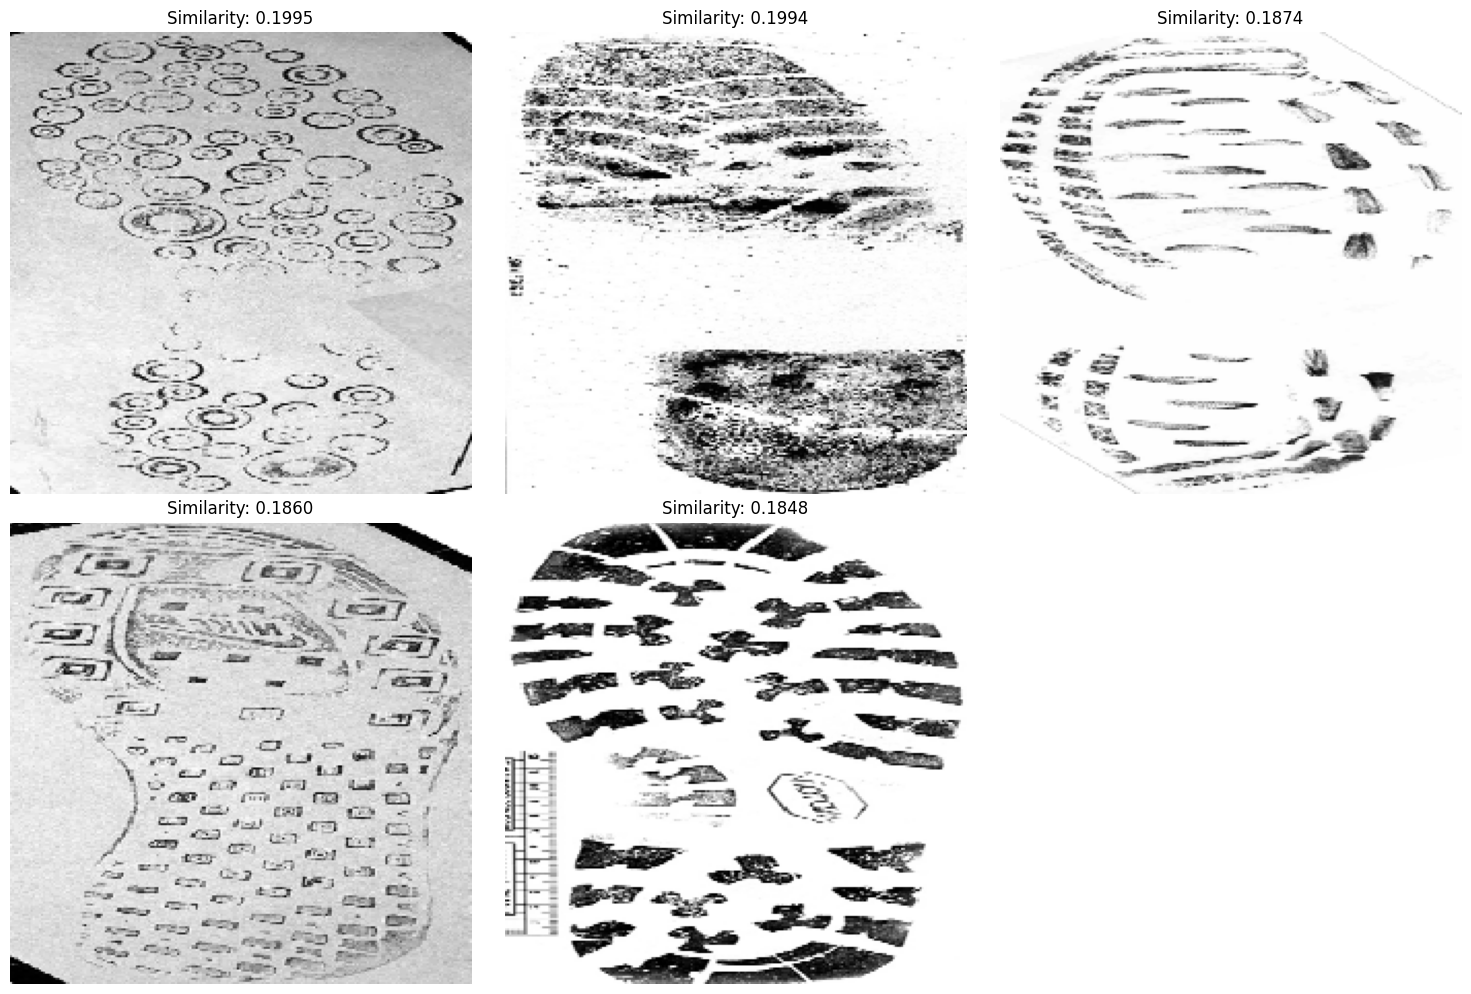

In [13]:
# Example usage
query_image_path = 'C:/Users/black/Desktop/00257.jpg'
similar_images = retrieve_similar_images(query_image_path)

# Display or do something with similar images
for img_path, similarity in similar_images:
    print(f"Image: {img_path}, Similarity: {similarity}")
    # You can display, save, or process these similar images here
    
display_similar_images(similar_images)

1/1 [==============================] - 0s 376ms/step


1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 0s 425ms/step


1/1 [==============================] - 0s 310ms/step


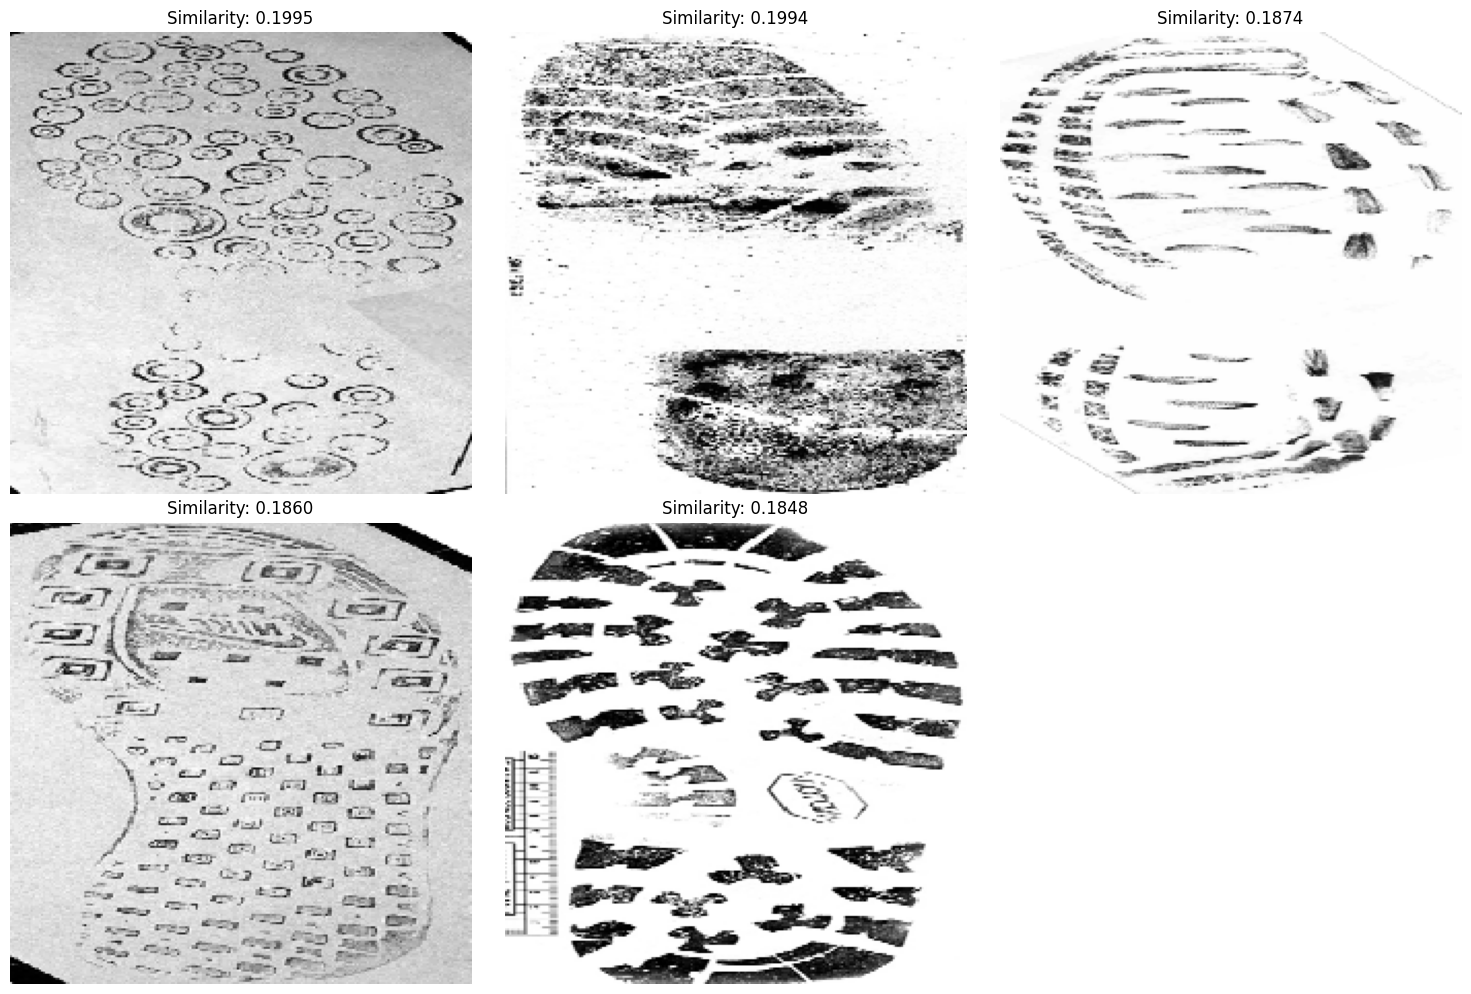

In [15]:

import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Function to display similar images
def display_similar_images(similar_images):
    plt.figure(figsize=(15, 10))
    for i, (img_path, similarity) in enumerate(similar_images, 1):
        img = keras_image.load_img(img_path, target_size=(224, 224))
        plt.subplot(2, 3, i)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
query_image_path = 'C:/Users/black/Desktop/00257.jpg'
similar_images = retrieve_similar_images(query_image_path)

# Display similar images
display_similar_images(similar_images)


1/1 [==============================] - 0s 245ms/step


1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 237ms/step


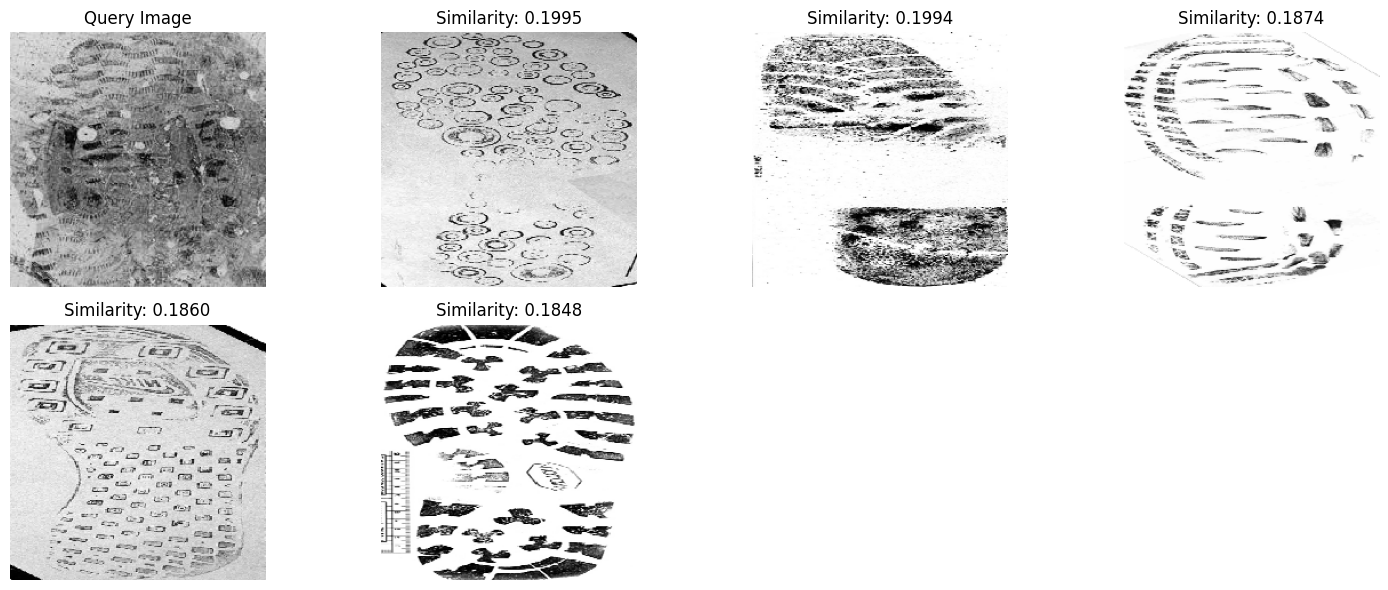

In [16]:
import matplotlib.pyplot as plt



# Function to display query and similar images
def display_query_and_similar(query_image_path, similar_images):
    plt.figure(figsize=(15, 6))

    # Display query image
    plt.subplot(2, 4, 1)
    query_img = keras_image.load_img(query_image_path, target_size=(224, 224))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, (img_path, similarity) in enumerate(similar_images, 2):
        img = keras_image.load_img(img_path, target_size=(224, 224))
        plt.subplot(2, 4, i)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
query_image_path = 'C:/Users/black/Desktop/00257.jpg'
similar_images = retrieve_similar_images(query_image_path)

# Display query and similar images
display_query_and_similar(query_image_path, similar_images)
